<a href="https://colab.research.google.com/github/TimL2/Group_Project_2_ML_Bot/blob/Tim/ML_Trading_Bot_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!pip install alpaca-trade-api
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
# Initial imports
import pandas as pd
import alpaca_trade_api as tradeapi
from finta import TA
import numpy as np

In [100]:
ALPACA_API_KEY = 'PKETI0Q5C8PPUXVNHJFJ'
ALPACA_SECRET_KEY = 'WQxmEpBCoMXydCCg0G8cUe6hGLpgaAfrvedZ09Fy'
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"

In [101]:
# Create a connection to the API 
api = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, ALPACA_API_BASE_URL, api_version="v2")

In [102]:
# Set the ticket symbol and the number of shares to buy
ticker = "TSLA"
number_of_shares = 1

In [103]:
# Make API call
prices = api.get_bars(ticker, "1Min", "2022-09-01", "2022-10-19", adjustment='raw').df

In [104]:
signals_df = prices
signals_df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302
...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274


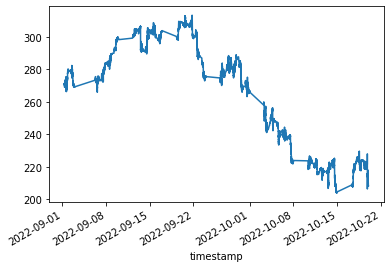

In [105]:
signals_df['close'].plot()

In [106]:
# Calculate the daily returns using the closing prices and the pct_change function
signals_df["actual_returns"] = signals_df["close"].pct_change()
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns
timestamp,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407
...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440


In [107]:
#  Setup EMAs for crosses
signals_df["9EMA"] = TA.EMA(signals_df, 9)
signals_df["20EMA"] = TA.EMA(signals_df, 20)
signals_df["50EMA"] = TA.EMA(signals_df, 50)
signals_df["200SMA"] = TA.SMA(signals_df, 200)

# Setup Indicators
signals_df["ATR"] = TA.ATR(signals_df)
bbands_df = TA.BBANDS(signals_df)
macd_df = TA.MACD(signals_df)
signals_df["OBV"] = TA.OBV(signals_df)
signals_df["RSI"] = TA.RSI(signals_df)

# join macd and bbands Dataframes to signals_df
bbands_df = pd.concat([bbands_df, macd_df], axis=1)
signals_df = pd.concat([signals_df, bbands_df], axis=1)
signals_df.drop(columns="SIGNAL", inplace=True)
signals_df

# Position Relative to BollingerBands, Above Upper_BB = 1, Below Lower_BB = -1, Inbetween both = 0
signals_df["Bollinger_Bands_Position"] = 0.0
# 9EMA is above 20EMA = 1
signals_df["9EMA/20EMA_Cross"] = 0.0
# 50 EMA is above 200SMA = 1
signals_df["50EMA/200SMA_Cross"] = 0.0
# MACD Increasing = 1, Decreasing = -1
signals_df["MACD_Rate"] = 0.0
# OBV is positive = 1, OBV is 
signals_df["OBV_Zero_Cross"] = 0.0
# If RSI is above 70: +1, If RSI below 30: -1
signals_df["RSI_Position"] = 0.0
# Price is crossing above VWAP = 1
signals_df["VWAP_Cross"] = 0.0

# Review DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,-0.003141,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,-0.004002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,-0.034624,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,-0.035413,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,209.5855,208.359544,-0.437777,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,209.4990,208.193273,-0.463343,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,209.3990,207.985205,-0.502025,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# here we create the exit column, our "y", for use in supervised ML
# How many rows are in the signals_df? for use in modifying DataFrame
periods = signals_df.shape[0]
# Exit is the labeled target for ML, Exit Price is for use in Pnl Metrics
signals_df["Exit"] = 0
signals_df["Exit Price"] = 0

# Exit is the labeled target for ML, Exit Price is for use in Pnl Metrics
signals_df["Exit"] = 0
signals_df["Exit Price"] = 0

# we also figure out our exit price
# target price signaling a win will be 1
# stop price signaling a loss will be -1
# loop thru the dataframe, from row 200 to the end (periods)
for j in range(200, periods):
    # entries will be on candle close
    entry = signals_df["close"].iloc[j]
    # calculate volatility for each candle
    atr = signals_df["ATR"].iloc[j]
    # stop is entry price minus the average volatility for the entry period
    stop = entry - atr
    # target is entry price plus the average volatility for the entry period times a multiplier
    target = entry + (3 * atr)
    # loop again thru the dataset to compare j entry price to future closing prices to see if we hit target or stop
    for k in range(j + 1, periods):
        # current low of the candle
        curr_low = signals_df["low"].iloc[k]
        # current high of the candle
        curr_high = signals_df["high"].iloc[k]
        # record and break if we hit stop or target, if not we check the next k period
        # if current low breaks our stop we should've sold: -1 in our "Exit" column
        if curr_low <= stop:
            signals_df["Exit Price"].iloc[j] = stop
            signals_df["Exit"].iloc[j] = -1
            # if we hit the stop break the inner loop to check the next row
            break
        # if current high breaks our target we should've sold: +1 in our "Exit" column
        elif curr_high >= target:
            signals_df["Exit Price"].iloc[j] = target
            signals_df["Exit"].iloc[j] = 1
            # if we hit the target break the inner loop to check the next row
            break

# drop beginning columns to avoid NaN values from EMA/SMA calculations
signals_df = signals_df[200:]

signals_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 12:17:00+00:00,272.5125,272.6500,272.5125,272.58,2621,124,272.526688,-0.000257,272.781700,272.872601,...,-0.061621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.400029
2022-09-01 12:18:00+00:00,272.5799,272.5799,272.4400,272.44,1828,57,272.460122,-0.000514,272.713360,272.831401,...,-0.087181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.251450
2022-09-01 12:19:00+00:00,272.4300,272.5000,272.3000,272.50,5842,175,272.370376,0.000220,272.670688,272.799839,...,-0.101427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.310743
2022-09-01 12:20:00+00:00,272.3503,272.5700,272.3500,272.57,5439,56,272.468074,0.000257,272.650550,272.777949,...,-0.105849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.375029
2022-09-01 12:21:00+00:00,272.4000,272.4000,272.3700,272.37,1608,47,272.399026,-0.000734,272.594440,272.739097,...,-0.124061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,272.980629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.6000,208.6500,208.3500,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,-0.437777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,208.324286
2022-10-19 23:56:00+00:00,208.6100,208.6500,208.3500,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,-0.463343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,208.116429
2022-10-19 23:57:00+00:00,208.3100,208.3300,208.0000,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,-0.502025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,207.794286


In [109]:
column_names = signals_df.columns
df = pd.DataFrame(columns = column_names)
df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [110]:
for index, row in signals_df.iterrows(): 
    if signals_df["Bollinger_Bands_Position"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["Bollinger_Bands_Position"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [111]:
for index, row in signals_df.iterrows(): 
    if signals_df["9EMA/20EMA_Cross"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["9EMA/20EMA_Cross"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [112]:
for index, row in signals_df.iterrows(): 
    if signals_df["50EMA/200SMA_Cross"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["50EMA/200SMA_Cross"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [113]:
for index, row in signals_df.iterrows(): 
    if signals_df["OBV_Zero_Cross"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["OBV_Zero_Cross"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [114]:
for index, row in signals_df.iterrows(): 
    if signals_df["RSI_Position"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["RSI_Position"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [115]:
for index, row in signals_df.iterrows(): 
    if signals_df["VWAP_Cross"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["VWAP_Cross"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price


In [116]:
signals_df[:10]

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,MACD,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,MACD_Rate,OBV_Zero_Cross,RSI_Position,VWAP_Cross,Exit,Exit Price
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 12:17:00+00:00,272.5125,272.6500,272.5125,272.5800,2621,124,272.526688,-0.000257,272.781700,272.872601,...,-0.061621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.400029
2022-09-01 12:18:00+00:00,272.5799,272.5799,272.4400,272.4400,1828,57,272.460122,-0.000514,272.713360,272.831401,...,-0.087181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.251450
2022-09-01 12:19:00+00:00,272.4300,272.5000,272.3000,272.5000,5842,175,272.370376,0.000220,272.670688,272.799839,...,-0.101427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.310743
2022-09-01 12:20:00+00:00,272.3503,272.5700,272.3500,272.5700,5439,56,272.468074,0.000257,272.650550,272.777949,...,-0.105849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.375029
2022-09-01 12:21:00+00:00,272.4000,272.4000,272.3700,272.3700,1608,47,272.399026,-0.000734,272.594440,272.739097,...,-0.124061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,272.980629
2022-09-01 12:22:00+00:00,272.4500,272.4500,272.3602,272.3602,2774,94,272.408165,-0.000036,272.547592,272.703012,...,-0.137698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,272.895786
2022-09-01 12:23:00+00:00,272.3602,272.5000,272.3602,272.5000,4083,73,272.394001,0.000513,272.538074,272.683677,...,-0.135660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.325764
2022-09-01 12:24:00+00:00,272.5000,272.8900,272.5000,272.6000,3774,115,272.587109,0.000367,272.550459,272.675708,...,-0.124541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.415050
2022-09-01 12:25:00+00:00,272.7600,272.7600,272.7600,272.7600,642,59,272.725417,0.000587,272.592367,272.683736,...,-0.101647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,272.568621


In [117]:
X = signals_df[["Bollinger_Bands_Position", "9EMA/20EMA_Cross", "50EMA/200SMA_Cross", "OBV_Zero_Cross", "RSI_Position", "VWAP_Cross"]]
X

,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,OBV_Zero_Cross,RSI_Position,VWAP_Cross
timestamp,,,,,,
2022-09-01 12:17:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:18:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:19:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:20:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:21:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
#y = df.loc[df["Exit"] != 0]
y = signals_df['Exit']
y

timestamp
2022-09-01 12:17:00+00:00   -1
2022-09-01 12:18:00+00:00   -1
2022-09-01 12:19:00+00:00   -1
2022-09-01 12:20:00+00:00   -1
2022-09-01 12:21:00+00:00    1
                            ..
2022-10-19 23:55:00+00:00   -1
2022-10-19 23:56:00+00:00   -1
2022-10-19 23:57:00+00:00   -1
2022-10-19 23:58:00+00:00    0
2022-10-19 23:59:00+00:00    0
Name: Exit, Length: 30099, dtype: int64

In [119]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [120]:
# Select the start of the training period
training_begin = str(y.index.min())

# Display the training begin date
training_begin

'2022-09-01 12:17:00+00:00'

In [121]:
# Select the ending period for the training data with an offset of 3 months
training_end = str(y.index.min() + DateOffset(months=1))

# Display the training end date
training_end

'2022-10-01 12:17:00+00:00'

In [122]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train

,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,OBV_Zero_Cross,RSI_Position,VWAP_Cross
timestamp,,,,,,
2022-09-01 12:17:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:18:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:19:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:20:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:21:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-09-30 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
y_train

timestamp
2022-09-01 12:17:00+00:00   -1
2022-09-01 12:18:00+00:00   -1
2022-09-01 12:19:00+00:00   -1
2022-09-01 12:20:00+00:00   -1
2022-09-01 12:21:00+00:00    1
                            ..
2022-09-30 23:55:00+00:00   -1
2022-09-30 23:56:00+00:00   -1
2022-09-30 23:57:00+00:00   -1
2022-09-30 23:58:00+00:00   -1
2022-09-30 23:59:00+00:00   -1
Name: Exit, Length: 18201, dtype: int64

In [124]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test

,Bollinger_Bands_Position,9EMA/20EMA_Cross,50EMA/200SMA_Cross,OBV_Zero_Cross,RSI_Position,VWAP_Cross
timestamp,,,,,,
2022-10-03 04:42:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-03 05:44:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-03 06:07:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-03 06:59:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-03 07:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
y_test

timestamp
2022-10-03 04:42:00+00:00   -1
2022-10-03 05:44:00+00:00   -1
2022-10-03 06:07:00+00:00   -1
2022-10-03 06:59:00+00:00   -1
2022-10-03 07:04:00+00:00   -1
                            ..
2022-10-19 23:55:00+00:00   -1
2022-10-19 23:56:00+00:00   -1
2022-10-19 23:57:00+00:00   -1
2022-10-19 23:58:00+00:00    0
2022-10-19 23:59:00+00:00    0
Name: Exit, Length: 11898, dtype: int64

In [126]:
 # Imports
from sklearn.preprocessing import StandardScaler

In [127]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [128]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [129]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [130]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86     13605
           1       0.00      0.00      0.00      4596

    accuracy                           0.75     18201
   macro avg       0.37      0.50      0.43     18201
weighted avg       0.56      0.75      0.64     18201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
 # Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [132]:
 # Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

          -1       0.73      1.00      0.84      8700
           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00      3189

    accuracy                           0.73     11898
   macro avg       0.24      0.33      0.28     11898
weighted avg       0.53      0.73      0.62     11898



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
 # Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = signals_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
timestamp,,,
2022-10-03 04:42:00+00:00,-1,-0.029769,0.029769
2022-10-03 05:44:00+00:00,-1,-0.000504,0.000504
2022-10-03 06:07:00+00:00,-1,0.007752,-0.007752
2022-10-03 06:59:00+00:00,-1,-0.006538,0.006538
2022-10-03 07:04:00+00:00,-1,0.000077,-0.000077


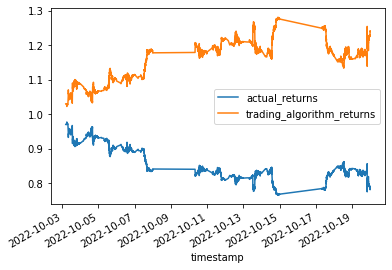

In [134]:
 # Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [135]:
 # Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [136]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [137]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [138]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([-1, -1, -1, ..., -1, -1, -1])

In [139]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86     13605
           1       0.00      0.00      0.00      4596

    accuracy                           0.75     18201
   macro avg       0.37      0.50      0.43     18201
weighted avg       0.56      0.75      0.64     18201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [141]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

          -1       0.73      1.00      0.84      8700
           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00      3189

    accuracy                           0.73     11898
   macro avg       0.24      0.33      0.28     11898
weighted avg       0.53      0.73      0.62     11898



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

          -1       0.73      1.00      0.84      8700
           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00      3189

    accuracy                           0.73     11898
   macro avg       0.24      0.33      0.28     11898
weighted avg       0.53      0.73      0.62     11898



In [143]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

          -1       0.73      1.00      0.84      8700
           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00      3189

    accuracy                           0.73     11898
   macro avg       0.24      0.33      0.28     11898
weighted avg       0.53      0.73      0.62     11898

